In [ ]:
# GOOGLE COLAB: EXECUTE THIS CELL
! pip install lammps -q
! pip install git+https://github.com/henriasv/lammps-logfile.git

In [1]:
# EXECUTE THIS CELL
import re

import pandas as pd
import numpy as np

from scipy.optimize import curve_fit
import warnings
from scipy.optimize import OptimizeWarning
warnings.simplefilter("ignore", OptimizeWarning)    # Suppress only OptimizeWarning

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

import lammps_logfile
from lammps import lammps

# Exercise: Diffusion of Hydrogen in Palladium

Molecular dynamics (MD) simulations are a powerful tool for understanding the atomic-scale mechanisms that underlie real-world materials behavior. In fields like hydrogen storage, fuel cells, and catalysis, the ability of hydrogen to diffuse through metals such as palladium is of critical importance. However, these processes are difficult to observe directly at the atomic level.

In this exercise, you will study the diffusion of hydrogen (H) atoms in a palladium (Pd) matrix using molecular dynamics simulations. Palladium has a face-centered cubic (FCC) structure, and hydrogen atoms occupy interstitial sites, forming an interstitial solid solution.

You are provided with equilibrated atomic configurations of Pd with a dilute concentration of hydrogen (`PdH_equilibrated_*.data`) at different temperatures (350 K, 400 K, 450 K, 500 K). Your task is to analyze how hydrogen atoms move through the Pd lattice over time, and to extract physical insights about the diffusion process.

Specifically, you will:

- Perform molecular dynamics simulations at different temperatures,

- Load time-resolved mean squared displacement (MSD) data for H atoms,

- Fit a linear model to the MSD vs. time curves to determine diffusion coefficients at each temperature,

- Construct an Arrhenius plot of $\ln D$ vs. $1/T$ to extract the activation energy for hydrogen diffusion in palladium.

<div style="text-align: center;">
  <img src="PdH_crop.gif" style="width: 500px;">
  <p style="font-size: 0.9em; text-align: center;">
    Hydrogen diffusion in a palladium (Pd) matrix. Hydrogen atoms (black) move through the semitransparent grey Pd lattice, with their trajectories visualized as they evolve over time.
  </p>
</div>

# (a) Production runs

## 350 K

1. Begin by copying the files `PdH_Zhou_June29_2007_2.eam.alloy` and `PdH_equilibrated_*.data` into your working directory.

2. Execute the cell to generate a LAMMPS input script for a simulation at 350 K. This snippet will create a file named `PdH_350.in` in your working directory. Take a moment to understand the simulation setup and parameters before executing the cell.

3. Then run the next cell to submit the simulation.

4. Make note of the files and associated properties generated during the simulation.

5. Once the simulation at 350 K is complete, duplicate both cells and adapt them to run simulations at the other temperatures of interest: 400 K, 450 K, and 500 K.

    > **Important:**  
    > Make sure to update all temperature-specific values in both the input script and the submission command, including:
    > - The target temperature,
    > - Output file names (to avoid overwriting),
    > - Any labels used in filenames, variables, or logs.

In [2]:
%%writefile PdH_350.in
# Set up units and boundaries
units       metal
boundary    p p p
atom_style  atomic

# Read input data
read_data   PdH_equilibrated_350.data

# Define masses for atomic types
mass 1      1.00794  # H
mass 2      106.42  # Pd 

pair_style eam/alloy
pair_coeff * * PdH_Zhou_June29_2007_2.eam.alloy H Pd

##################################
# Parameters #
variable    randomSeed equal        40       
variable    timeStepLength equal    0.001    # In ps
variable    tDamp equal             0.1      # Thermostat damping (ps)
variable    pDamp equal             1        # Barostat damping (ps)
variable    startingTemp equal      350      # Initial temperature in K
variable    externalPressure equal  0.0      # External pressure in atm
variable    run1 equal              50000   # Steps 
##################################

group Hatoms    type 1 
compute         Hmsd Hatoms msd com yes
variable        time equal step*${timeStepLength}

fix msdout all ave/time 100 1 100 c_Hmsd[4] file msd_H_350.txt

# Set timestep
timestep    ${timeStepLength}

# Starting simulation

thermo_style custom step temp press ke pe etotal vol enthalpy c_Hmsd[*]
thermo_modify flush yes
thermo 100

dump        dump1 all custom 5000 350.traj.dump id type x y z

# Step 1: 
fix         1 all npt temp ${startingTemp} ${startingTemp} ${tDamp} iso ${externalPressure} ${externalPressure} ${pDamp}
run         ${run1}
unfix       1

Writing PdH_350.in


In [3]:
# EXECUTE THIS CELL
lmp = lammps(cmdargs=["-log", "PdH_350.log"])
lmp.file("PdH_350.in")

LAMMPS (29 Aug 2024 - Update 1)
Reading data file ...
  triclinic box = (-11.454339 -53.785056 -14.769247) to (15.562493 62.001364 36.877401) with tilt (-8.4553612e-15 3.7715223e-15 3.7715223e-15)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  7711 atoms
  reading velocities ...
  7711 velocities
  read_data CPU = 0.023 seconds
151 atoms in group Hatoms

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.35
  ghost atom cutoff = 7.35
  binsize = 3.675, bins = 8 32 15
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attri

## 400 K

In [21]:
lmp = lammps(cmdargs=["-log", "PdH_400.log"])
lmp.file("PdH_400.in")

LAMMPS (29 Aug 2024 - Update 1)
Reading data file ...
  triclinic box = (-11.430704 -53.683764 -14.724066) to (15.538858 61.900072 36.83222) with tilt (-8.4405675e-15 3.7649236e-15 3.7649236e-15)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  7711 atoms
  reading velocities ...
  7711 velocities
  read_data CPU = 0.031 seconds
151 atoms in group Hatoms

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.35
  ghost atom cutoff = 7.35
  binsize = 3.675, bins = 8 32 15
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy, perpetual
      attrib

## 450 K

In [23]:
lmp = lammps(cmdargs=["-log", "PdH_450.log"])
lmp.file("PdH_450.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:10:25
Reading data file ...
  triclinic box = (-11.437646 -53.713514 -14.737336) to (15.5458 61.929822 36.84549) with tilt (-8.4449125e-15 3.7668617e-15 3.7668617e-15)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  7711 atoms
  reading velocities ...
  7711 velocities
  read_data CPU = 0.032 seconds
151 atoms in group Hatoms

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.35
  ghost atom cutoff = 7.35
  binsize = 3.675, bins = 8 32 15
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/alloy,

## 500 K

In [22]:
%%writefile PdH_500.in
# Set up units and boundaries
units       metal
boundary    p p p
atom_style  atomic

# Read input data
read_data   PdH_equilibrated_500.data

# Define masses for atomic types
mass 1      1.00794  # H
mass 2      106.42  # Pd

pair_style eam/alloy
pair_coeff * * PdH_Zhou_June29_2007_2.eam.alloy H Pd

##################################
# Parameters #
variable    randomSeed equal        40
variable    timeStepLength equal    0.001    # In ps
variable    tDamp equal             0.1      # Thermostat damping (ps)
variable    pDamp equal             1        # Barostat damping (ps)
variable    startingTemp equal      500      # Initial temperature in K
variable    externalPressure equal  0.0      # External pressure in atm
variable    run1 equal              50000   # Steps
##################################

group Hatoms    type 1
compute         Hmsd Hatoms msd com yes
variable        time equal step*${timeStepLength}

fix msdout all ave/time 100 1 100 c_Hmsd[4] file msd_H_500.txt

# Set timestep
timestep    ${timeStepLength}

# Starting simulation

thermo_style custom step temp press ke pe etotal vol enthalpy c_Hmsd[*]
thermo_modify flush yes
thermo 100

dump        dump1 all custom 5000 500.traj.dump id type x y z

# Step 1:
fix         1 all npt temp ${startingTemp} ${startingTemp} ${tDamp} iso ${externalPressure} ${externalPressure} ${pDamp}
run         ${run1}
unfix       1

Writing PdH_500.in


In [24]:
lmp = lammps(cmdargs=["-log", "PdH_500.log"])
lmp.file("PdH_500.in")

LAMMPS (29 Aug 2024 - Update 1)
Total wall time: 0:06:05
Reading data file ...
  triclinic box = (-11.470697 -53.855162 -14.800518) to (15.578851 62.07147 36.908672) with tilt (-8.4656003e-15 3.7760895e-15 3.7760895e-15)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  7711 atoms
  reading velocities ...
  7711 velocities
  read_data CPU = 0.024 seconds
151 atoms in group Hatoms

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.35
  ghost atom cutoff = 7.35
  binsize = 3.675, bins = 8 32 15
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/allo

# (b) Harvest MSD data

In this step, you will load the MSD data for hydrogen diffusion from your simulations at different temperatures, merge them into a single DataFrame, and create a time axis.

1. Identify the correct output files for each temperature. You can find the filenames either in your LAMMPS input scripts or directly in your working folder.  
Then, replace `'name of the text file'` with the actual filenames in the code snippet below.

2. The provided snippet:
    - Loads each file using `pd.read_csv`,
    - Merges the DataFrames on the `Step` column (which represents simulation time steps),
    - Converts the timestep to time in picoseconds,
    - Reorders columns for clarity.

3. Execute the cell once all file names are correctly inserted. You should see a table with time and MSD values at all four temperatures.

If you are proficient in Python, feel free to implement your own solution using loops or functions, as long as the final output matches the expected format.

In [25]:
# COMPLETE AND EXECUTE THIS CELL

# Time conversion: 1 timestep = 1 fs = 0.001 ps
timestep_fs = 1
fs_to_ps = 0.001

# Load all MSD files
df_350 = pd.read_csv('msd_H_350.txt', comment='#', sep=r'\s+', names=['Step', 'MSD 350K'])
df_400 = pd.read_csv('msd_H_400.txt', comment='#', sep=r'\s+', names=['Step', 'MSD 400K'])
df_450 = pd.read_csv('msd_H_450.txt', comment='#', sep=r'\s+', names=['Step', 'MSD 450K'])
df_500 = pd.read_csv('msd_H_500.txt', comment='#', sep=r'\s+', names=['Step', 'MSD 500K'])

# Merge on Step
df = df_350.merge(df_400, on='Step').merge(df_450, on='Step').merge(df_500, on='Step')

# Add Time column in ps
df['Time [ps]'] = df['Step'] * timestep_fs * fs_to_ps

# Reorder columns
df = df[['Step', 'Time [ps]', 'MSD 350K', 'MSD 400K', 'MSD 450K', 'MSD 500K']]

# Show result
df.round(3)

,Step,Time [ps],MSD 350K,MSD 400K,MSD 450K,MSD 500K
0,0,0.0,0.000,0.000,0.000,0.000
1,100,0.1,0.434,0.352,0.548,0.422
2,200,0.2,0.538,0.475,0.932,0.621
3,300,0.3,0.726,0.626,1.258,0.877
4,400,0.4,0.734,0.749,1.510,1.506
...,...,...,...,...,...,...
496,49600,49.6,37.303,45.368,69.633,102.170
497,49700,49.7,37.580,45.917,68.574,102.823
498,49800,49.8,37.148,45.685,69.287,102.451
499,49900,49.9,37.180,45.452,69.250,102.233


This DataFrame presents mean squared displacement (MSD) data over time for different temperatures.

  * `Step`: Simulation step index.

  * `Time [ps]`: Time in picoseconds corresponding to each simulation step.
  
  * `MSD 350K` to `MSD 500K`: Mean squared displacement values at 350K, 400K, 450K, and 500K, respectively.

4. Now, complete the code snippet below to plot all the MSD datasets on a single graph.
  - Replace `'header of the x column'` and `'header of the y column'` with the exact column names from the DataFrame that you want to plot. Make sure the names match the DataFrame headers exactly.

  - You will need to do this four times: once for each temperature dataset.

Total wall time: 0:47:12
Total wall time: 0:45:05
Total wall time: 0:42:09
Total wall time: 0:40:28
Total wall time: 0:38:47
Total wall time: 0:36:31


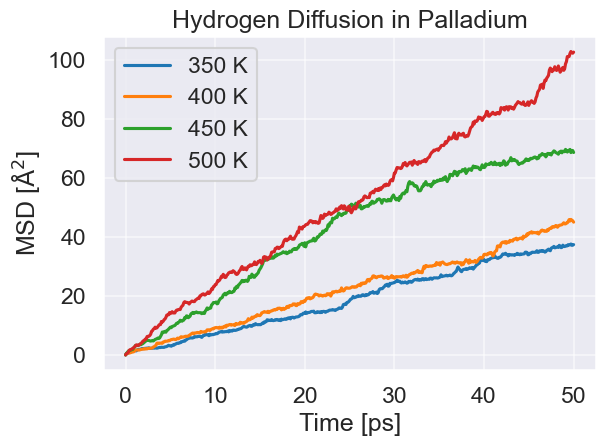

In [26]:
# COMPLETE AND EXECUTE THIS CELL

sns.lineplot(data=df, x='Time [ps]', y='MSD 350K', label='350 K')
sns.lineplot(data=df, x='Time [ps]', y='MSD 400K', label='400 K')
sns.lineplot(data=df, x='Time [ps]', y='MSD 450K', label='450 K')
sns.lineplot(data=df, x='Time [ps]', y='MSD 500K', label='500 K')

plt.xlabel('Time [ps]')
plt.ylabel(r'MSD [$\mathrm{\AA^2}$]')

plt.title("Hydrogen Diffusion in Palladium")
plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## (c) Calculate diffusion coefficients

Calculate the diffusion coefficient at the given temperatures by applying Einstein’s relation with $d=3$:
$$
\text{MSD}(t) = 2dDt
$$

The diffusion coefficient is extracted from the slope of the MSD vs. time curve, which we expect to be linear at long times:
$$
\text{MSD}(t) = a \cdot t + b
$$

> Think about the physical meaning of MSD at time $t=0$.
> What value should the MSD have at the very beginning of the simulation?
> What does that tell you about the constant $b$?

Below is a generic function you can use for curve fitting: adapt it according to your answer to the previous questions.

In [27]:
# ADAPT AND EXECUTE THIS CELL

# Linear model: MSD(t) = a * t + b
def msd_model(t, a, b):
    return a * t + b

<details>
<summary>Spoiler Alert</summary>

If you reasoned that MSD should be zero at $t = 0$, you're right! Here's a simplified model that reflects that:

```python
# MSD(t) = a * t, with zero intercept
def msd_model(t, a):
    return a * t
```
</details> 

Adapt the following code snippet to extract the diffusion coefficient $D$ at each temperature using the DataFrame from the previous task.

- Replace `'header of the x column'` with `'Time [ps]'`.

- Replace `'header of the y column'` with the MSD column corresponding to the temperature you're working with (e.g., `'MSD 350K'`).

- Set the correct dimensionality of the system, so the denominator becomes $2d$ in the Einstein relation.

Repeat this process for the other temperatures by adapting the MSD column name and label in `print()`.

Bonus: Try fitting with and without the intercept. Do you see a difference in extracted $D$?
What might cause a non-zero intercept?

In [28]:
from scipy.optimize import curve_fit

# Dimensionality of the system
d = 3  # FCC, 3D

# Time axis
t = df['Time [ps]'].values

### 350 K
msd_350 = df['MSD 350K'].values
popt_350, _ = curve_fit(msd_model, t, msd_350)
D_350 = popt_350[0] / (2 * d)
print(f"T = 350 K: D = {D_350:.2e} Å²/ps")

### 400 K
msd_400 = df['MSD 400K'].values
popt_400, _ = curve_fit(msd_model, t, msd_400)
D_400 = popt_400[0] / (2 * d)
print(f"T = 400 K: D = {D_400:.2e} Å²/ps")

### 450 K
msd_450 = df['MSD 450K'].values
popt_450, _ = curve_fit(msd_model, t, msd_450)
D_450 = popt_450[0] / (2 * d)
print(f"T = 450 K: D = {D_450:.2e} Å²/ps")

### 500 K
msd_500 = df['MSD 500K'].values
popt_500, _ = curve_fit(msd_model, t, msd_500)
D_500 = popt_500[0] / (2 * d)
print(f"T = 500 K: D = {D_500:.2e} Å²/ps")

T = 350 K: D = 1.30e-01 Å²/ps
T = 400 K: D = 1.46e-01 Å²/ps
T = 450 K: D = 2.42e-01 Å²/ps
T = 500 K: D = 3.17e-01 Å²/ps


## (d) Arrhenius fitting

Now that you've extracted the diffusion coefficients $D$ at different temperatures, it's time to organize your results in a table so you can use them for further analysis (like Arrhenius fitting).

1. Replace the placeholder list of `temperatures` with the actual values used in your simulations (e.g., `350`).

2. Replace the list of `diffusion_coeffs` with the actual *variable names* (not the numerical values) you defined for each diffusion coefficient (e.g., `D_350`).

3. Run the cell to create a new DataFrame `df_diffusion_fits` with:
    - Temperature
    - Diffusion coefficient
    - Inverse temperature 
    - Natural logarithm of the diffusion coefficient 

In [29]:
# COMPLETE AND EXECUTE THIS CELL

# Lists of values
temperatures = [350, 400, 450, 500]
diffusion_coeffs = [D_350, D_400, D_450, D_500]

# Create the DataFrame
df_diffusion_fits = pd.DataFrame({
    'T [K]': temperatures,
    'D [Å²/ps]': diffusion_coeffs
})

# Add derived columns
df_diffusion_fits['1/T [1/K]'] = 1 / df_diffusion_fits['T [K]']
df_diffusion_fits['ln D'] = np.log(df_diffusion_fits['D [Å²/ps]'])

# Show it
df_diffusion_fits

,T [K],D [Å²/ps],1/T [1/K],ln D
0,350,0.130470,0.002857,-2.036614
1,400,0.146278,0.002500,-1.922247
2,450,0.242389,0.002222,-1.417213
3,500,0.317354,0.002000,-1.147736


Complete and execute the following snippet to fit the natural logarithm of the diffusion coefficient $\ln D$ to a linear function of inverse temperature $1/T$, based on the Arrhenius equation:
$$
\ln D = \ln D_0 - \frac{E_a}{k_B T}
$$

Be sure to input the correct column headers from the previous DataFrame where required.

This allows you to extract two important physical parameters:

- $D_0$: the pre-exponential factor,

- $E_a$: the activation energy, in eV.

In [30]:
# COMPLETE AND EXECUTE THIS CELL

# Extract values
invT = df_diffusion_fits['1/T [1/K]'].values
lnD = df_diffusion_fits['ln D'].values

# Define linear Arrhenius model
def arrhenius_ln(invT, slope, intercept):
    return slope * invT + intercept

# Fit
popt, _ = curve_fit(arrhenius_ln, invT, lnD)
slope, intercept = popt

# Extract physical parameters
kB = 8.617e-5  # eV/K
Ea_eV = -slope * kB
D0 = np.exp(intercept)

print(f"Fitted activation energy Ea = {Ea_eV:.3f} eV")
print(f"Fitted pre-exponential factor D0 = {D0:.2e} Å²/ps")

Fitted activation energy Ea = 0.094 eV
Fitted pre-exponential factor D0 = 2.64e+00 Å²/ps


Finally, execute the last snippet to visualize the fit.

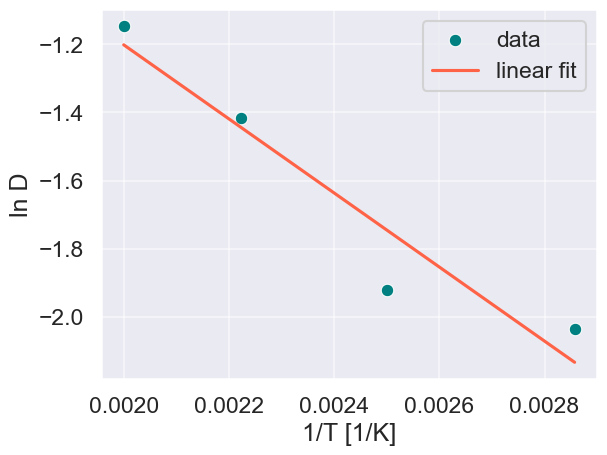

In [31]:
# EXECUTE THIS CELL
sns.scatterplot(x=invT, y=lnD, label='data', color='teal')
sns.lineplot(x=invT, y=arrhenius_ln(invT, slope, intercept), label='linear fit', color='tomato')

plt.xlabel('1/T [1/K]')
plt.ylabel('ln D')

plt.grid(True, alpha=0.5)
plt.legend()
plt.show()